# 1차 미팅 후 데이터 분석 결과 공유 by 경민

***

## 1. baseline code (무시해도 OK)

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

train = pd.read_csv('train.csv').drop(columns=['ID'])
test = pd.read_csv('test.csv').drop(columns=['ID'])
X = train.drop('임신 성공 여부', axis=1) # input
y = train['임신 성공 여부'] # target
categorical_columns = [
    "시술 시기 코드",
    "시술 당시 나이",
    "시술 유형",
    "특정 시술 유형",
    "배란 자극 여부",
    "배란 유도 유형",
    "단일 배아 이식 여부",
    "착상 전 유전 검사 사용 여부",
    "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인",
    "남성 부 불임 원인",
    "여성 주 불임 원인",
    "여성 부 불임 원인",
    "부부 주 불임 원인",
    "부부 부 불임 원인",
    "불명확 불임 원인",
    "불임 원인 - 난관 질환",
    "불임 원인 - 남성 요인",
    "불임 원인 - 배란 장애",
    "불임 원인 - 여성 요인",
    "불임 원인 - 자궁경부 문제",
    "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인",
    "불임 원인 - 정자 운동성",
    "불임 원인 - 정자 형태",
    "배아 생성 주요 이유",
    "총 시술 횟수",
    "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수",
    "DI 시술 횟수",
    "총 임신 횟수",
    "IVF 임신 횟수",
    "DI 임신 횟수",
    "총 출산 횟수",
    "IVF 출산 횟수",
    "DI 출산 횟수",
    "난자 출처",
    "정자 출처",
    "난자 기증자 나이",
    "정자 기증자 나이",
    "동결 배아 사용 여부",
    "신선 배아 사용 여부",
    "기증 배아 사용 여부",
    "대리모 여부",
    "PGD 시술 여부",
    "PGS 시술 여부"
]
for col in categorical_columns:
    X[col] = X[col].astype(str)
    test[col] = test[col].astype(str)
numeric_columns = [
    "임신 시도 또는 마지막 임신 경과 연수",
    "총 생성 배아 수",
    "미세주입된 난자 수",
    "미세주입에서 생성된 배아 수",
    "이식된 배아 수",
    "미세주입 배아 이식 수",
    "저장된 배아 수",
    "미세주입 후 저장된 배아 수",
    "해동된 배아 수",
    "해동 난자 수",
    "수집된 신선 난자 수",
    "저장된 신선 난자 수",
    "혼합된 난자 수",
    "파트너 정자와 혼합된 난자 수",
    "기증자 정자와 혼합된 난자 수",
    "난자 채취 경과일",
    "난자 해동 경과일",
    "난자 혼합 경과일",
    "배아 이식 경과일",
    "배아 해동 경과일"
]

X = X.iloc[:, 52:63] # 본인 관련 데이터만 슬라이싱

## 2. "난자 출처" 분석

난자 출처 별 데이터 개수
본인 제공     234291
기증 제공      15769
알 수 없음      6291
Name: 난자 출처, dtype: int64



(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

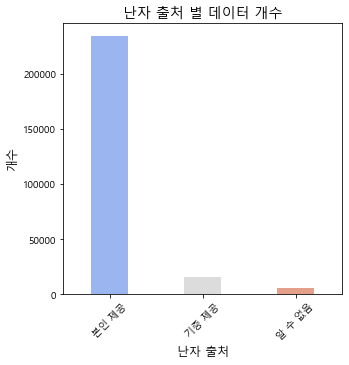

In [3]:
# '난자 출처'별 데이터 개수 세기
egg_total_counts = train['난자 출처'].value_counts()
print("난자 출처 별 데이터 개수")
print(egg_total_counts)
print()

# plot 그리기
plt.figure(figsize=(5, 5))
sns.barplot(x=egg_total_counts.index, y=egg_total_counts.values, width=0.4, palette="coolwarm")
plt.title("난자 출처 별 데이터 개수", fontsize=14)
plt.xlabel("난자 출처", fontsize=12)
plt.ylabel("개수", fontsize=12)
plt.xticks(rotation=45)

난자 출처 별 성공률
난자 출처
기증 제공     0.315429
본인 제공     0.257983
알 수 없음    0.128914
Name: 임신 성공 여부, dtype: float64



(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

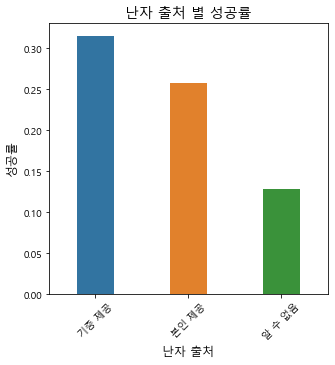

In [4]:
# '난자 출처'로 '임신 성공 여부' 평균(성공률) 계산
egg_success_rate = train.groupby('난자 출처')['임신 성공 여부'].mean()
print("난자 출처 별 성공률")
print(egg_success_rate)
print()

# plot 그리기
plt.figure(figsize=(5, 5))
sns.barplot(x=egg_success_rate.index, y=egg_success_rate.values, width=0.4)
plt.title("난자 출처 별 성공률", fontsize=14)
plt.xlabel("난자 출처", fontsize=12)
plt.ylabel("성공률", fontsize=12)
plt.xticks(rotation=45)

## 3. "정자 출처" 분석

정자 출처 별 데이터 개수
배우자 제공         229199
기증 제공           27016
미할당               122
배우자 및 기증 제공        14
Name: 정자 출처, dtype: int64



(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

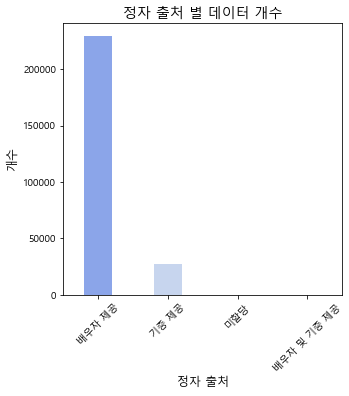

In [5]:
# '정자 출처'별 데이터 개수 세기
sperm_total_counts = train['정자 출처'].value_counts()
print("정자 출처 별 데이터 개수")
print(sperm_total_counts)
print()

plt.figure(figsize=(5, 5))
sns.barplot(x=sperm_total_counts.index, y=sperm_total_counts.values, width=0.4, palette="coolwarm")
plt.title("정자 출처 별 데이터 개수", fontsize=14)
plt.xlabel("정자 출처", fontsize=12)
plt.ylabel("개수", fontsize=12)
plt.xticks(rotation=45)

정자 출처 별 성공률
정자 출처
기증 제공          0.243744
미할당            0.106557
배우자 및 기증 제공    0.000000
배우자 제공         0.260167
Name: 임신 성공 여부, dtype: float64



(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

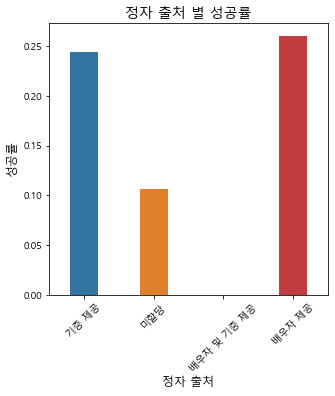

In [6]:
# '정자 출처'로 '임신 성공 여부' 평균(성공률) 계산
sperm_success_rate = train.groupby('정자 출처')['임신 성공 여부'].mean()
print("정자 출처 별 성공률")
print(sperm_success_rate)
print()

plt.figure(figsize=(5, 5))
sns.barplot(x=sperm_success_rate.index, y=sperm_success_rate.values, width=0.4)
plt.title("정자 출처 별 성공률", fontsize=14)
plt.xlabel("정자 출처", fontsize=12)
plt.ylabel("성공률", fontsize=12)
plt.xticks(rotation=45)

## 4. "난자 기증자 나이" 분석

난자 기증자 나이 별 데이터 개수
알 수 없음     242381
만31-35세      6366
만26-30세      4976
만21-25세      2334
만20세 이하       294
Name: 난자 기증자 나이, dtype: int64



(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

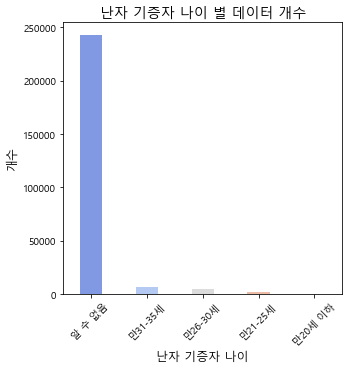

In [7]:
# '난자 기증자 나이'별 데이터 개수 세기
egg_age_total_counts = train['난자 기증자 나이'].value_counts()
print("난자 기증자 나이 별 데이터 개수")
print(egg_age_total_counts)
print()

plt.figure(figsize=(5, 5))
sns.barplot(x=egg_age_total_counts.index, y=egg_age_total_counts.values, width=0.4, palette="coolwarm")
plt.title("난자 기증자 나이 별 데이터 개수", fontsize=14)
plt.xlabel("난자 기증자 나이", fontsize=12)
plt.ylabel("개수", fontsize=12)
plt.xticks(rotation=45)

난자 기증자 나이 별 성공률
난자 기증자 나이
만20세 이하    0.261905
만21-25세    0.329906
만26-30세    0.348272
만31-35세    0.305215
알 수 없음     0.254579
Name: 임신 성공 여부, dtype: float64



(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

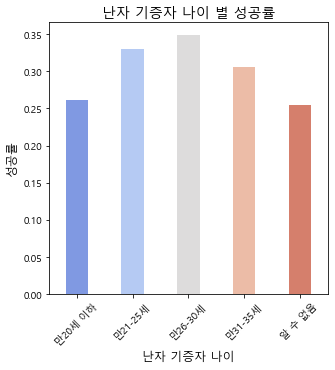

In [8]:
# '난자 기증자 나이'로 '임신 성공 여부' 평균(성공률) 계산
egg_age_success_rate = train.groupby('난자 기증자 나이')['임신 성공 여부'].mean()
print("난자 기증자 나이 별 성공률")
print(egg_age_success_rate)
print()

plt.figure(figsize=(5, 5))
sns.barplot(x=egg_age_success_rate.index, y=egg_age_success_rate.values, width=0.4, palette="coolwarm")
plt.title("난자 기증자 나이 별 성공률", fontsize=14)
plt.xlabel("난자 기증자 나이", fontsize=12)
plt.ylabel("성공률", fontsize=12)
plt.xticks(rotation=45)

## 5. "정자 기증자 나이" 분석

정자 기증자 나이 별 데이터 개수
알 수 없음     230518
만21-25세      5667
만36-40세      5282
만26-30세      5058
만31-35세      4911
만41-45세      3848
만20세 이하      1067
Name: 정자 기증자 나이, dtype: int64



(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

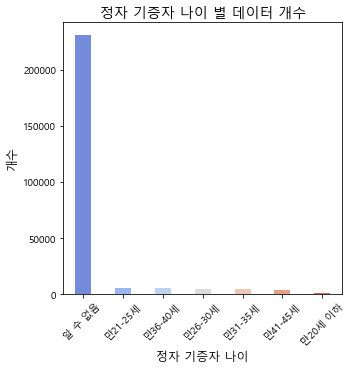

In [9]:
# '정자 기증자 나이'별 데이터 개수 세기
sperm_age_total_counts = train['정자 기증자 나이'].value_counts()
print("정자 기증자 나이 별 데이터 개수")
print(sperm_age_total_counts)
print()

plt.figure(figsize=(5, 5))
sns.barplot(x=sperm_age_total_counts.index, y=sperm_age_total_counts.values, width=0.4, palette="coolwarm")
plt.title("정자 기증자 나이 별 데이터 개수", fontsize=14)
plt.xlabel("정자 기증자 나이", fontsize=12)
plt.ylabel("개수", fontsize=12)
plt.xticks(rotation=45)

정자 기증자 나이 별 성공률
정자 기증자 나이
만20세 이하    0.209934
만21-25세    0.241398
만26-30세    0.248122
만31-35세    0.248626
만36-40세    0.245740
만41-45세    0.242983
알 수 없음     0.259967
Name: 임신 성공 여부, dtype: float64



(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

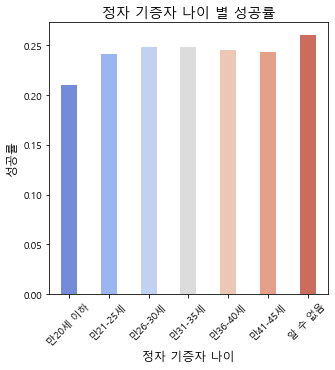

In [10]:
# '정자 기증자 나이'로 '임신 성공 여부' 평균(성공률) 계산
sperm_age_success_rate = train.groupby('정자 기증자 나이')['임신 성공 여부'].mean()
print("정자 기증자 나이 별 성공률")
print(sperm_age_success_rate)
print()

plt.figure(figsize=(5, 5))
sns.barplot(x=sperm_age_success_rate.index, y=sperm_age_success_rate.values, width=0.4, palette="coolwarm")
plt.title("정자 기증자 나이 별 성공률", fontsize=14)
plt.xlabel("정자 기증자 나이", fontsize=12)
plt.ylabel("성공률", fontsize=12)
plt.xticks(rotation=45)

## 6. "배아 종류" 분석

동결 배아 사용 여부     40126.0
신선 배아 사용 여부    210136.0
기증 배아 사용 여부      2458.0
dtype: float64



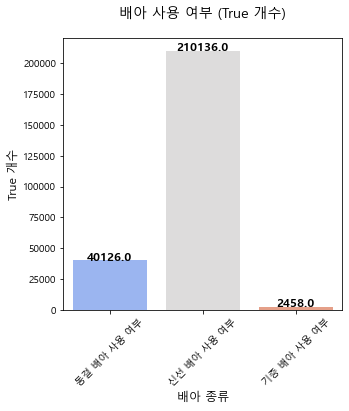

In [11]:
# 세 가지 feature에 대한 True 값 개수 계산
embryo_counts = train[['동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부']].sum()
print(train[['동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부']].sum())
print()

plt.figure(figsize=(5, 5))
ax = sns.barplot(x=embryo_counts.index, y=embryo_counts.values, palette="coolwarm")

# 막대 위에 값 표시
for i, v in enumerate(embryo_counts.values):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=12, color='black', fontweight='bold')

plt.title("배아 사용 여부 (True 개수)", fontsize=14, pad=20)
plt.xlabel("배아 종류", fontsize=12)
plt.ylabel("True 개수", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## 7. 동결/신선 배아 성공률 분석

In [12]:
fresh_egg_success_rate = train.groupby('신선 배아 사용 여부')['임신 성공 여부'].mean()
print("신선 배아 사용 여부 별 성공률")
print(fresh_egg_success_rate)
print()

# 신선 배아의 경우 사용 시 성공률 증가

신선 배아 사용 여부 별 성공률
신선 배아 사용 여부
0.0    0.229586
1.0    0.267689
Name: 임신 성공 여부, dtype: float64



In [13]:
freeze_egg_success_rate = train.groupby('동결 배아 사용 여부')['임신 성공 여부'].mean()
print("동결 배아 사용 여부 별 성공률")
print(freeze_egg_success_rate)
print()

# 동결 배아는 오히려 사용 시 성공률 감소

동결 배아 사용 여부 별 성공률
동결 배아 사용 여부
0.0    0.267760
1.0    0.229402
Name: 임신 성공 여부, dtype: float64



## 8. "기증 배아" 분석

In [14]:
donate_egg_success_rate = train.groupby('기증 배아 사용 여부')['임신 성공 여부'].mean()
print("기증 배아 사용 여부 별 성공률")
print(donate_egg_success_rate)
print()

# 기증 배아의 경우 사용 시 성공률 대폭 증가

기증 배아 사용 여부 별 성공률
기증 배아 사용 여부
0.0    0.260951
1.0    0.327502
Name: 임신 성공 여부, dtype: float64



## 9. "대리모 여부" 분석

대리모 여부 별 데이터 개수
0.0    249011
1.0      1049
Name: 대리모 여부, dtype: int64



(array([0, 1]), <a list of 2 Text major ticklabel objects>)

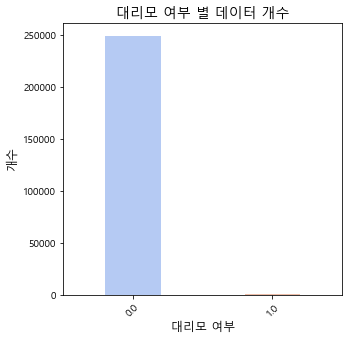

In [15]:
dopa_total_counts = train['대리모 여부'].value_counts()
print("대리모 여부 별 데이터 개수")
print(dopa_total_counts)
print()

plt.figure(figsize=(5, 5))
sns.barplot(x=dopa_total_counts.index, y=dopa_total_counts.values, width=0.4, palette="coolwarm")
plt.title("대리모 여부 별 데이터 개수", fontsize=14)
plt.xlabel("대리모 여부", fontsize=12)
plt.ylabel("개수", fontsize=12)
plt.xticks(rotation=45)

대리모 여부 별 성공률
대리모 여부
0.0    0.261490
1.0    0.288847
Name: 임신 성공 여부, dtype: float64



Text(0, 0.5, '성공률')

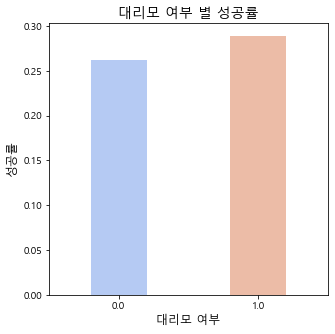

In [16]:
dopa_success_rate = train.groupby('대리모 여부')['임신 성공 여부'].mean()
print("대리모 여부 별 성공률")
print(dopa_success_rate)
print()

plt.figure(figsize=(5, 5))
sns.barplot(x=dopa_success_rate.index, y=dopa_success_rate.values, width=0.4, palette="coolwarm")
plt.title("대리모 여부 별 성공률", fontsize=14)
plt.xlabel("대리모 여부", fontsize=12)
plt.ylabel("성공률", fontsize=12)

## 10. "PGD 시술 여부" 분석

In [17]:
pgd_total_counts = train['PGD 시술 여부'].value_counts()
print("PGD 시술 여부 별 데이터 개수")
print(pgd_total_counts)
print()

pgd_success_rate = train.groupby('PGD 시술 여부')['임신 성공 여부'].mean()
print("PGD 시술 여부 별 성공률")
print(pgd_success_rate)
print()

PGD 시술 여부 별 데이터 개수
1.0    2179
Name: PGD 시술 여부, dtype: int64

PGD 시술 여부 별 성공률
PGD 시술 여부
1.0    0.279486
Name: 임신 성공 여부, dtype: float64



## 11. PGS 시술 여부 분석

In [18]:
pgs_total_counts = train['PGS 시술 여부'].value_counts()
print("PGS 시술 여부 별 데이터 개수")
print(pgs_total_counts)
print()

pgs_success_rate = train.groupby('PGS 시술 여부')['임신 성공 여부'].mean()
print("PGS 시술 여부 별 성공률")
print(pgs_success_rate)
print()

PGS 시술 여부 별 데이터 개수
1.0    1929
Name: PGS 시술 여부, dtype: int64

PGS 시술 여부 별 성공률
PGS 시술 여부
1.0    0.206325
Name: 임신 성공 여부, dtype: float64



## etc. 동결/신선 배아 겹침 check

In [19]:
count = ((train['동결 배아 사용 여부'] == True) & (train['신선 배아 사용 여부'] == True)).sum()

print("Both feature1 and feature2 are True:", count)

Both feature1 and feature2 are True: 205


***

# PPT가 더 보기에 편하실겁니다!